In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (
    KMeans,
    DBSCAN
)

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)

from sklearn.decomposition import PCA

In [2]:
df_1 = pd.read_csv("./data/S07-hw-dataset-01.csv")
df_2 = pd.read_csv("./data/S07-hw-dataset-02.csv")
df_3 = pd.read_csv("./data/S07-hw-dataset-03.csv")

In [3]:
df_1.head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [5]:
df_1.describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [6]:
df_2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [8]:
df_2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [9]:
df_3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [10]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [11]:
df_3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


Во всех трёх датасетах нет пропусков и категориальных переменных.
Во всех случаях колонка `sample_id` выступает в роли идентификатора и для модели бесполезна.

Размеры датасетов:
|Датасет|Строк|Колонок-признаков (без `sample_id`)|
|-------|-------|-------|
|1      |12"000 |   8   |
|2      |8"000  |   3   |
|3      |15"000 |   5   |

Далее, последовательно проведём эксперементы по кластеризации с каждым их этих датасетов, с помощью различных методов и гиперпараметров и сравним результаты

In [12]:
def plot_pca_clusters(model, X):
    
    """
    PCA 2D визуализация кластеров. Возвращает fig для сохранения.
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    if hasattr(model, "labels_"):
        labels = model.labels_
        model_type = "DBSCAN" if isinstance(model, DBSCAN) else "Clustering"
    else:
        labels = model.predict(X)
        model_type = "KMeans"
    
    if -1 in labels:
        noise_mask = labels == -1
        valid_labels = labels[~noise_mask]
        valid_pca = X_pca[~noise_mask]
        ax.scatter(
            X_pca[noise_mask, 0], X_pca[noise_mask, 1],
            c="gray", marker="+", s=50, label="Шум"
        )
    else:
        valid_pca = X_pca
        valid_labels = labels
    
    scatter = ax.scatter(
        valid_pca[:, 0], valid_pca[:, 1], 
        c=valid_labels, cmap="viridis", alpha=0.7
    )
    
    if isinstance(model, KMeans):
        centers_pca = pca.transform(model.cluster_centers_)
        ax.scatter(
            centers_pca[:, 0], centers_pca[:, 1], 
            c="red", marker=".", s=200,
            ec="black", linewidth=3, label="Центры кластеров"
        )
    
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
    ax.set_title(f"{model_type} кластеры (PCA 2D)")
    plt.colorbar(scatter, ax=ax)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    return fig, ax  


In [13]:
def get_features(
    df: pd.DataFrame,
    first_numeric_param_name: str,
    last_numeric_param_name: str
) -> pd.DataFrame:
    
    scaler = StandardScaler()
    X = df.loc[:, first_numeric_param_name:last_numeric_param_name]
    X = scaler.fit_transform(X)
    
    return X

In [14]:
def cv_n_in_kmeans(
    X,
    n_start: int,
    n_stop: int,
    random_state: int=42
) -> dict:
    
    """
    Сбор показателей метрик и поиск лучшего n
    """
    
    metrics_history = {
        "n": [],
        "silhouette": [],
        "inertia": [],
        "davies_bouldin": [],
        "calinski_harabasz": []
    }

    for n in range(n_start, n_stop + 1):
 
        model = KMeans(n_clusters=n, random_state=random_state, n_init=10)
        model.fit(X)

        metrics_history["n"].append(n)
        metrics_history["silhouette"].append(silhouette_score(X, model.labels_))
        metrics_history["inertia"].append(model.inertia_)
        metrics_history["davies_bouldin"].append(davies_bouldin_score(X, model.labels_))
        metrics_history["calinski_harabasz"].append(calinski_harabasz_score(X, model.labels_))

    return {
        "best_n": {
            
            "silhouette": {
                "n": metrics_history["n"][np.argmax(metrics_history["silhouette"])], 
                "value": max(metrics_history["silhouette"])
            },
            
            "davies_bouldin": {
                "n": metrics_history["n"][np.argmin(metrics_history["davies_bouldin"])], 
                "value": min(metrics_history["davies_bouldin"])
            },
            
            "calinski_harabasz": {
                "n": metrics_history["n"][np.argmax(metrics_history["calinski_harabasz"])], 
                "value": max(metrics_history["calinski_harabasz"])
            }
        },
        
        "history": metrics_history
    }

In [15]:
def cv_dbscan_params(
    X,
    eps_variants: list[float],
    min_samples_variants: list[int],
    random_state: int=42
) -> dict:
    
    """
    Сбор показателей метрик и поиск лучших параметров DBSCAN
    """
    
    metrics_history = {
        "eps": [],
        "min_samples": [],
        "n_clusters": [],
        "noise_ratio": [],
        "silhouette": [],
        "davies_bouldin": [],
        "calinski_harabasz": []
    }

    for eps in eps_variants:
        for min_samples in min_samples_variants:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)
            
            # Фильтр плохих конфигов
            noise_ratio = (labels == -1).mean()
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            if noise_ratio > 0.4 or noise_ratio < 0.01 or n_clusters < 2 or n_clusters > 15:
                continue

            #Убираем шум из метрик
            valid_mask = labels != -1
            X_valid = X[valid_mask]
            labels_valid = labels[valid_mask]
            
            metrics_history["eps"].append(eps)
            metrics_history["min_samples"].append(min_samples)
            metrics_history["n_clusters"].append(n_clusters)
            metrics_history["noise_ratio"].append(noise_ratio)
            metrics_history["silhouette"].append(silhouette_score(X_valid, labels_valid))
            metrics_history["davies_bouldin"].append(davies_bouldin_score(X_valid, labels_valid))
            metrics_history["calinski_harabasz"].append(calinski_harabasz_score(X_valid, labels_valid))

    if not metrics_history["silhouette"]:
        return {"error": "Нет валидных параметров DBSCAN"}

    return {
        "best_params": {
            "silhouette": {
                "eps": metrics_history["eps"][np.argmax(metrics_history["silhouette"])],
                "min_samples": metrics_history["min_samples"][np.argmax(metrics_history["silhouette"])],
                "value": max(metrics_history["silhouette"])
            },
            "davies_bouldin": {
                "eps": metrics_history["eps"][np.argmin(metrics_history["davies_bouldin"])],
                "min_samples": metrics_history["min_samples"][np.argmin(metrics_history["davies_bouldin"])],
                "value": min(metrics_history["davies_bouldin"])
            }
        },
        "history": metrics_history
    }


In [16]:
def plot_kmeans_metrics(result: dict):
    
    """
    График всех метрик KMeans. Возвращает fig, axes.
    """
    
    history = result["history"]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    fig.suptitle("Метрики качества KMeans vs количество кластеров", fontsize=16)
    
    ################################################

    axes[0,0].plot(history["n"], history["silhouette"], "bo-", linewidth=2, markersize=8)
    axes[0,0].axvline(
        result["best_n"]["silhouette"]["n"], color="red", linestyle="--", 
        label=f"Лучший k={result['best_n']['silhouette']['n']}"
    )
    axes[0,0].set_title("Silhouette vs k")
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    
    axes[0,1].plot(history["n"], history["inertia"], "ro-", linewidth=2, markersize=8)
    axes[0,1].axvline(
        result["best_n"]["silhouette"]["n"], color="red", linestyle="--", 
        label=f"Рекомендуемый k={result['best_n']['silhouette']['n']}"
    )
    axes[0,1].set_title("Метод локтя (Inertia) vs k")
    axes[0,1].set_xlabel("Количество кластеров (k)")
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()
    
    ################################################
    
    axes[1,0].plot(history["n"], history["davies_bouldin"], "go-", linewidth=2, markersize=8)
    axes[1,0].axvline(
        result["best_n"]["davies_bouldin"]["n"], color="orange", linestyle="--", 
        label=f"Лучший k={result['best_n']['davies_bouldin']['n']}"
    )
    axes[1,0].set_title("Davies-Bouldin Index vs k")
    axes[1,0].set_xlabel("Количество кластеров (k)")
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend() 
    
    ################################################
    
    axes[1,1].plot(history["n"], history["calinski_harabasz"], "mo-", linewidth=2, markersize=8)
    axes[1,1].axvline(
        result["best_n"]["calinski_harabasz"]["n"], color="purple", linestyle="--", 
        label=f"Лучший k={result['best_n']['calinski_harabasz']['n']}"
    )
    axes[1,1].set_title("Calinski-Harabasz Index vs k")
    axes[1,1].set_xlabel("Количество кластеров (k)")
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()
    
    ################################################

    plt.tight_layout()
    return fig, axes 


In [17]:
def plot_dbscan_metrics(result: dict):
    
    """
    График всех метрик DBSCAN
    """
    
    history = result["history"]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    fig.suptitle("Метрики качества DBSCAN vs параметры", fontsize=16)
    
    ################################################

    axes[0,0].plot(history["eps"], history["silhouette"], "bo-", linewidth=2, markersize=8)
    axes[0,0].axvline(
        result["best_params"]["silhouette"]["eps"], color="red", linestyle="--", 
        label=f"Лучший eps={result['best_params']['silhouette']['eps']}\nmin_samples={result['best_params']['silhouette']['min_samples']}"
    )
    axes[0,0].set_title("Silhouette Score")
    axes[0,0].set_xlabel("eps")
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    
    ################################################
    
    axes[0,1].plot(history["eps"], history["noise_ratio"], "ro-", linewidth=2, markersize=8)
    axes[0,1].axvline(
        result["best_params"]["silhouette"]["eps"], color="red", linestyle="--", 
        label=f"Рекомендация eps={result['best_params']['silhouette']['eps']}\nmin_samples={result['best_params']['silhouette']['min_samples']}"
    )
    axes[0,1].set_title("Доля шума")
    axes[0,1].set_xlabel("eps")
    axes[0,1].set_ylabel("Noise ratio")
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()
    
    ################################################
    
    axes[1,0].plot(history["min_samples"], history["silhouette"], "go-", linewidth=2, markersize=8)
    axes[1,0].axvline(
        result["best_params"]["silhouette"]["min_samples"], color="orange", linestyle="--", 
        label=f"Лучший min_samples={result['best_params']['silhouette']['min_samples']}"
    )
    axes[1,0].set_title("Silhouette vs min_samples")
    axes[1,0].set_xlabel("min_samples")
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()
    
    ################################################
    
    axes[1,1].scatter(history["eps"], history["min_samples"], 
                     c=history["silhouette"], cmap="viridis", s=100, alpha=0.7)
    axes[1,1].axvline(result["best_params"]["silhouette"]["eps"], color="red", linestyle="--", alpha=0.7, label="Рекомендация")
    axes[1,1].axhline(result["best_params"]["silhouette"]["min_samples"], color="red", linestyle="--", alpha=0.7)
    axes[1,1].scatter(result["best_params"]["silhouette"]["eps"], 
                     result["best_params"]["silhouette"]["min_samples"], 
                     c="red", s=200, marker="*", edgecolors="black", linewidth=2, label="Лучшие параметры")
    axes[1,1].set_title("Silhouette: eps vs min_samples")
    axes[1,1].set_xlabel("eps")
    axes[1,1].set_ylabel("min_samples")
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()
    
    ################################################

    plt.tight_layout()
    return fig, axes 


In [18]:
def draw_validation(X, save_path_km, save_path_db):
    
    km_result = cv_n_in_kmeans(X, 2, 20)
    fig_km, _ = plot_kmeans_metrics(km_result)
    fig_km.savefig(save_path_km, dpi=300, bbox_inches='tight')

    D = X.shape[1]
    min_samples_variants = sorted({max(5, 2 * D), 3 * D, 4 * D})
    db_result = cv_dbscan_params(X, [0.1, 0.3, 0.5, 0.7], min_samples_variants)

    if "error" in db_result:
        fig_db = plt.figure(figsize=(10, 6))
        plt.text(
            0.5, 0.5, "DBSCAN: нет валидных параметров", 
            ha='center', va='center', fontsize=16
        )
        plt.axis('off')
        fig_db.savefig(save_path_db, dpi=300, bbox_inches='tight')
    else:
        fig_db, _ = plot_dbscan_metrics(db_result)
        fig_db.savefig(save_path_db, dpi=300, bbox_inches='tight')
    
    return km_result, db_result


In [19]:
def save_cluster_labels(model, df_raw, X_scaled, filepath):
    
    labels = model.fit_predict(X_scaled)
    
    labels_df = pd.DataFrame({
        "sample_id": df_raw.index.tolist(), 
        "cluster_label": labels
    })
    
    labels_df.to_csv(filepath, index=False)

In [20]:
metrics_summary = {}
best_configs = {}

In [21]:
X = get_features(df_1, "f01", "f08")

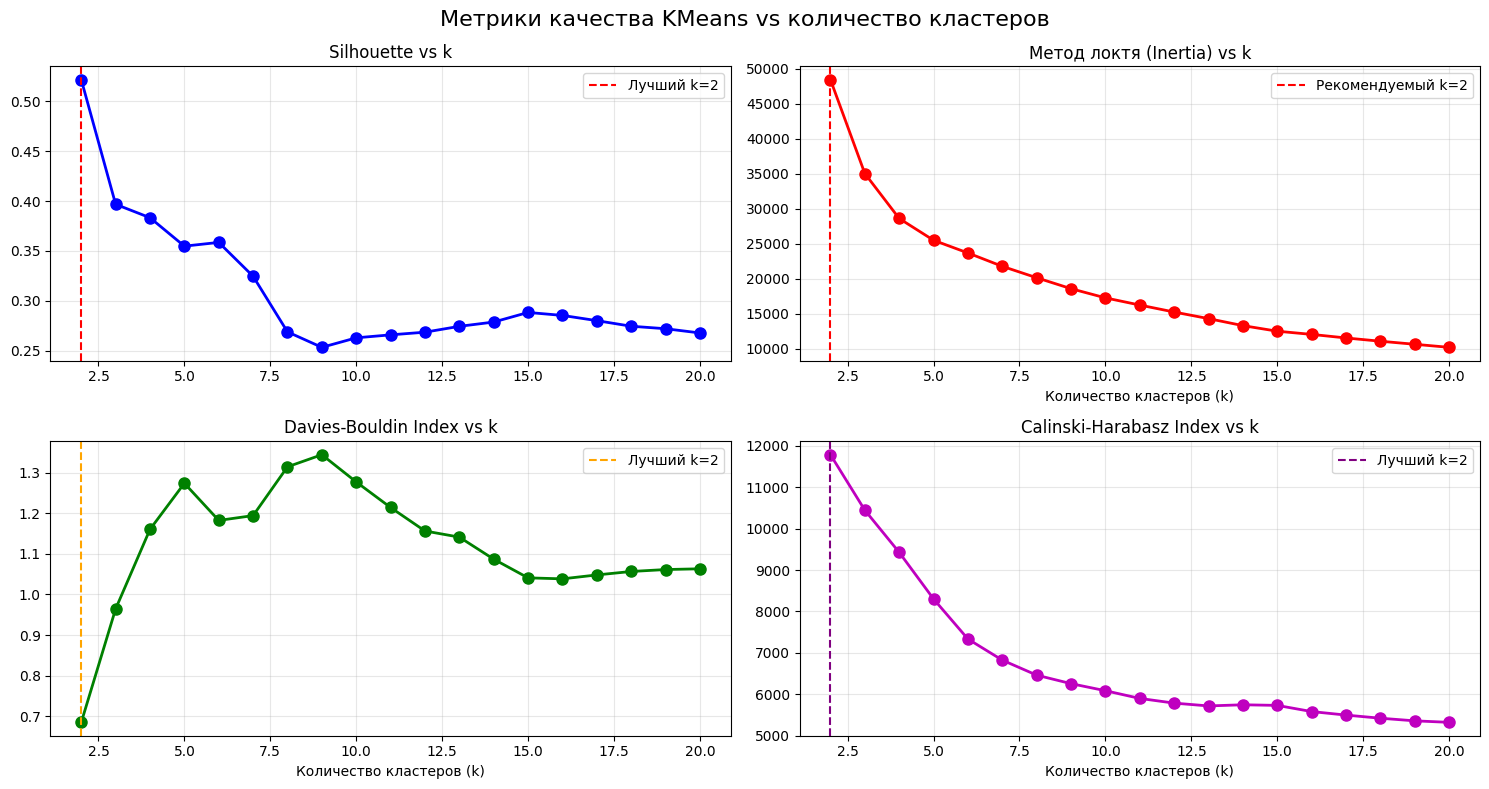

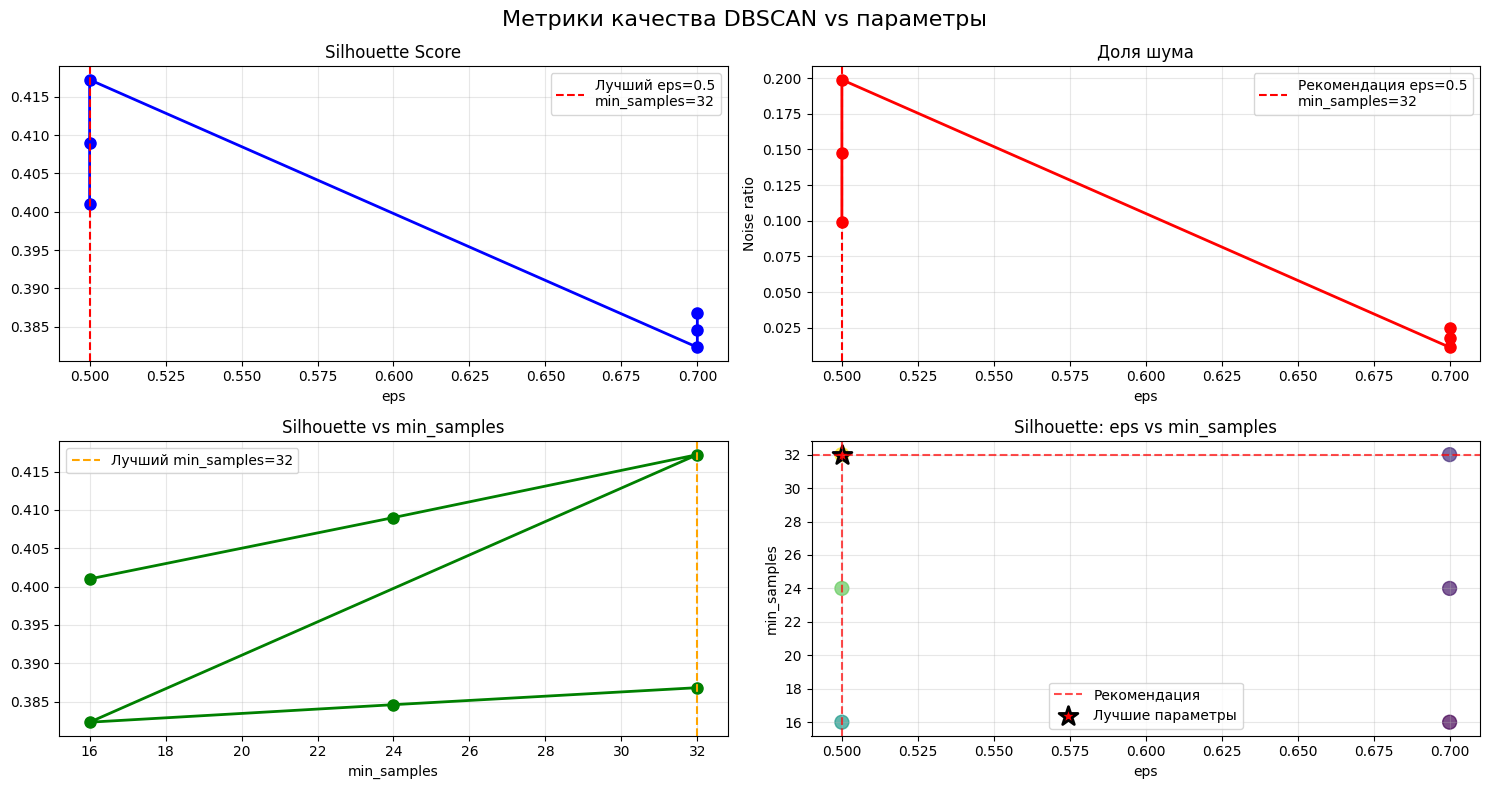

In [22]:
km_valid_res, db_valid_res = draw_validation(
    X, 
    "./artifacts/figures/KMeans_1ds_metrics.png", 
    "./artifacts/figures/DBSCAN_1ds_metrics.png"
)

metrics_summary["ds1"] = {
    "KMeans": km_valid_res,
    "DBSCAN": db_valid_res
}

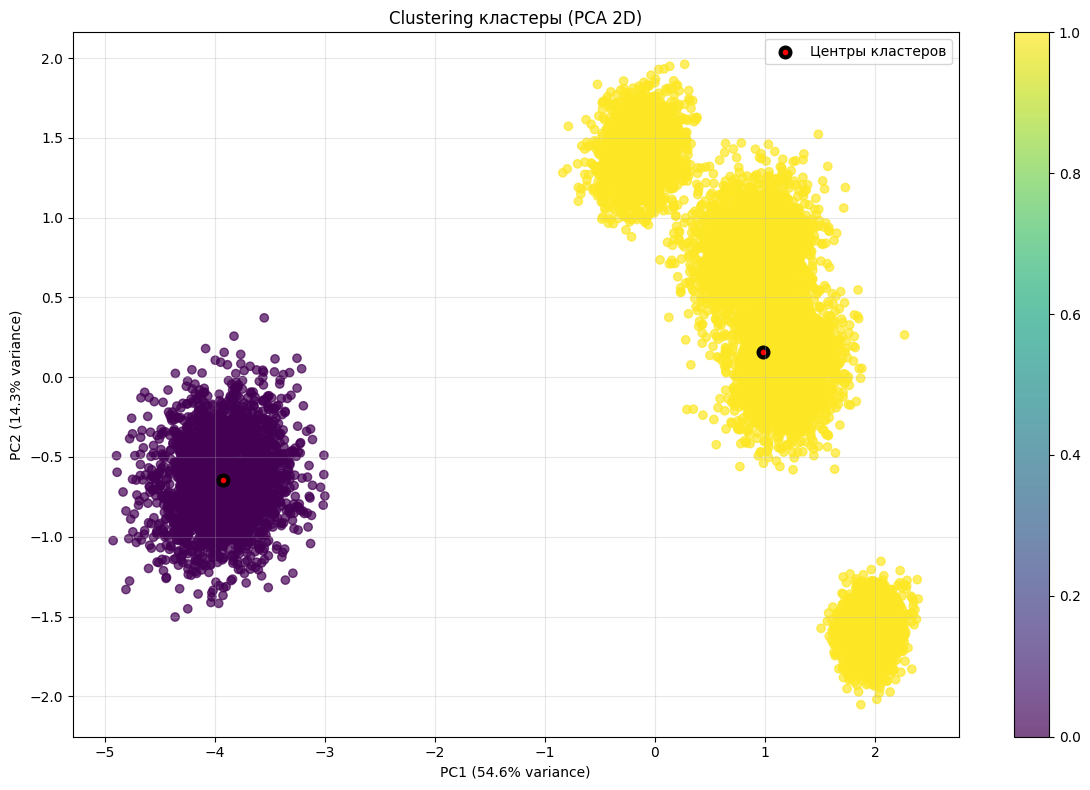

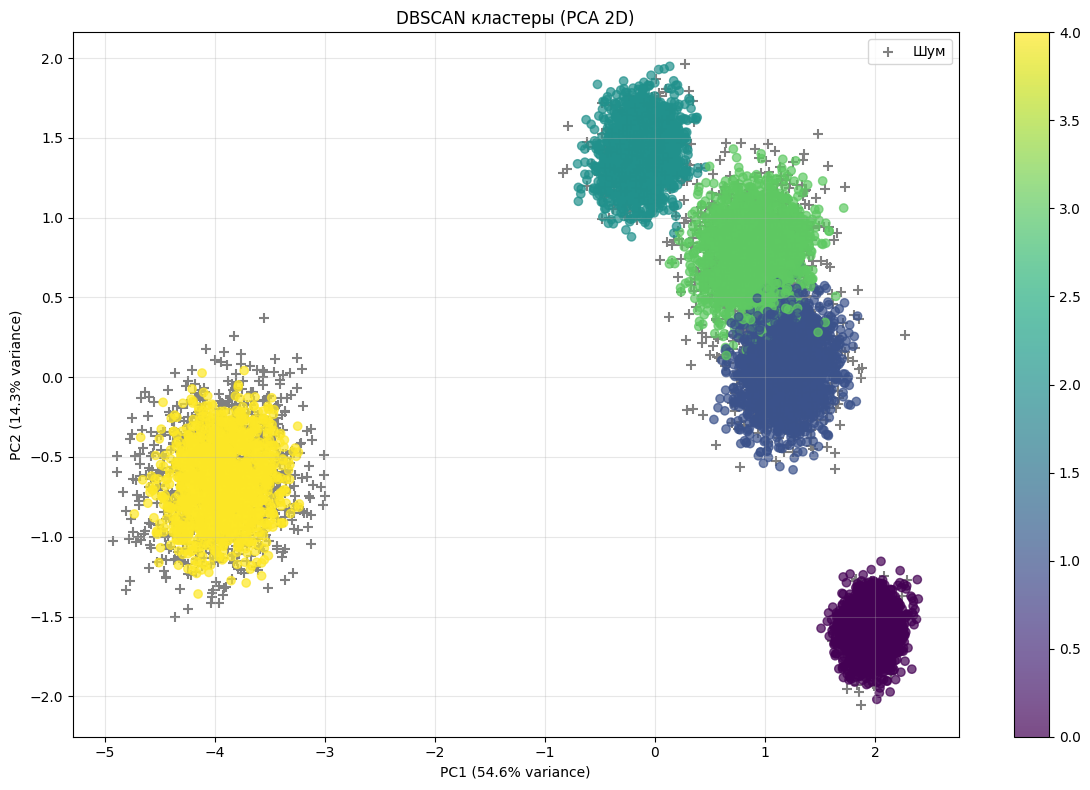

In [23]:
km = KMeans(n_clusters=2, n_init=10, random_state=42)
db = DBSCAN(eps=0.5, min_samples=32)

km.fit(X)
db.fit(X)

fig_km, ax_km = plot_pca_clusters(km, X) 
fig_km.savefig("./artifacts/figures/KMeans_1ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

fig_db, ax_db = plot_pca_clusters(db, X)
fig_db.savefig("./artifacts/figures/DBSCAN_1ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

Выводы в результате эксперемента:
- **Лучший метод**: `DBSCAN (eps=0.5, min_samples=32)`
- **Метрики**: Silhouette=**0.417**, DB=1.071, CH=8587
- **Доля шума**: **19.9%** (низкий уровень)
- **Почему**: На PCA, справа, видно скопление множества кластеров, которые из-за своей плотности определяются `KMeans` как один кластер, хотя в нём отчётливо просмтариваются уплотнения. Проблема `KMeans` в данном случае - невозможность обработать сложную форму, по который распределены данные.

In [24]:
best_configs["ds1"] = {
    "model": "DBSCAN",
    "params":{
        "eps": 0.5,
        "min_samples": 32
    }
}


save_cluster_labels(db, df_1, X, "./artifacts/labels/labels_hw07_ds1.csv")

In [25]:
X = get_features(df_2, "x1", "z_noise")

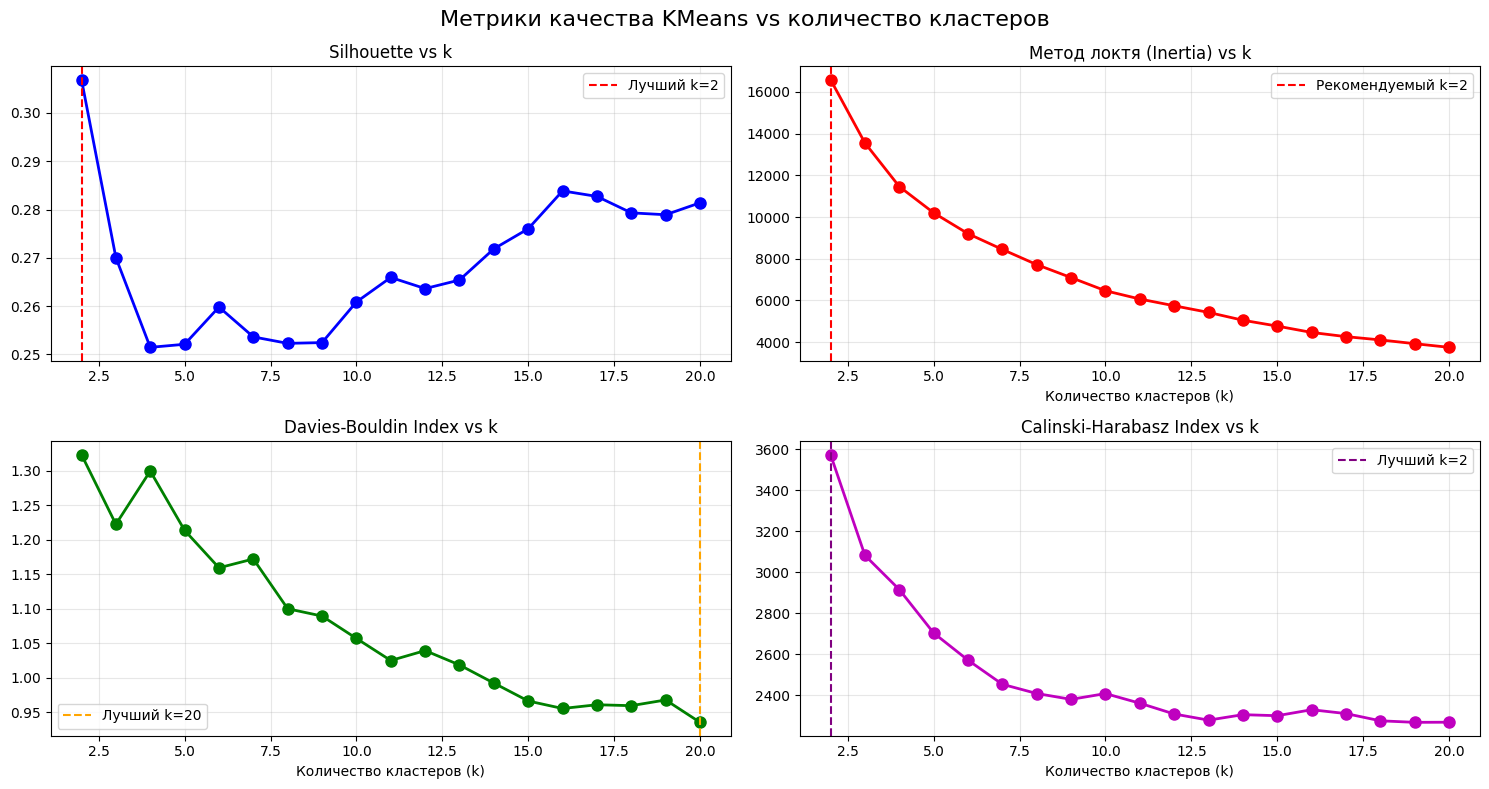

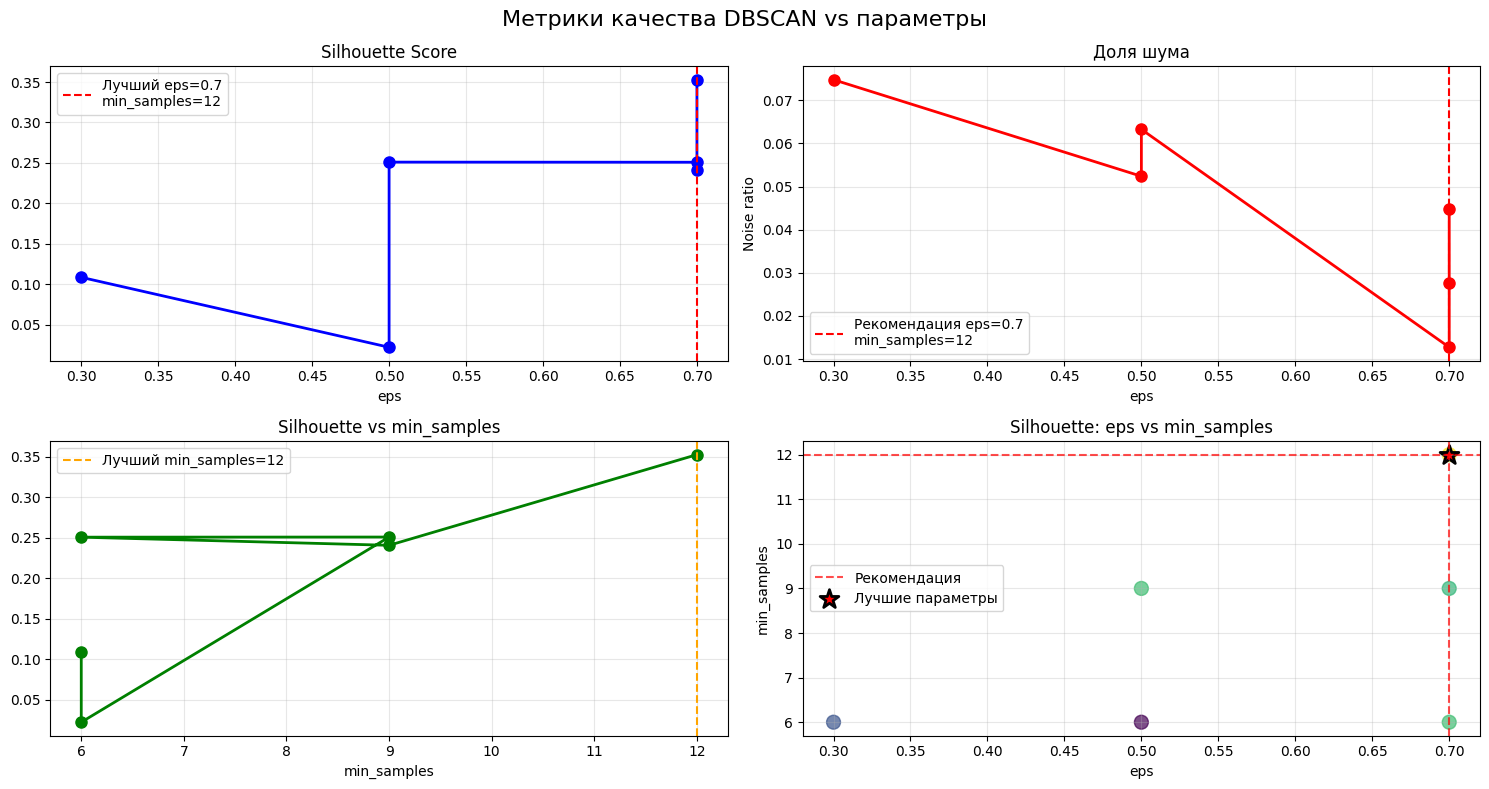

In [26]:
km_valid_res, db_valid_res = draw_validation(
    X, 
    "./artifacts/figures/KMeans_2ds_metrics.png", 
    "./artifacts/figures/DBSCAN_2ds_metrics.png"
)

metrics_summary["ds2"] = {
    "KMeans": km_valid_res,
    "DBSCAN": db_valid_res
}

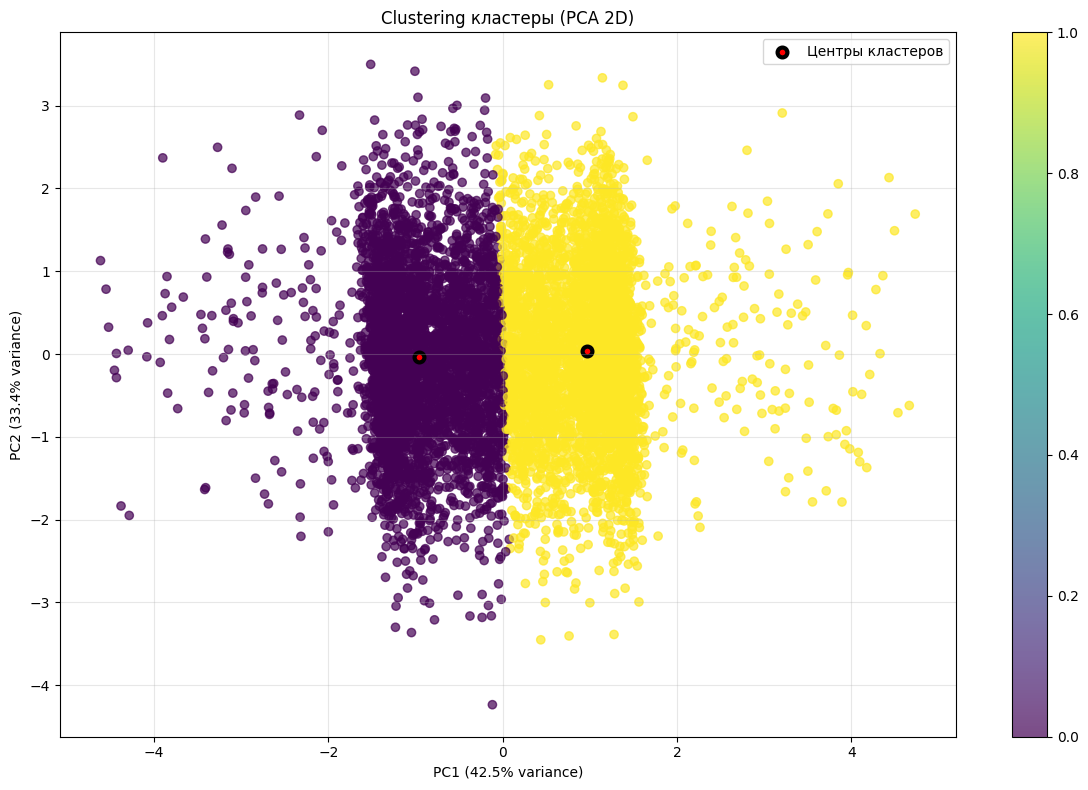

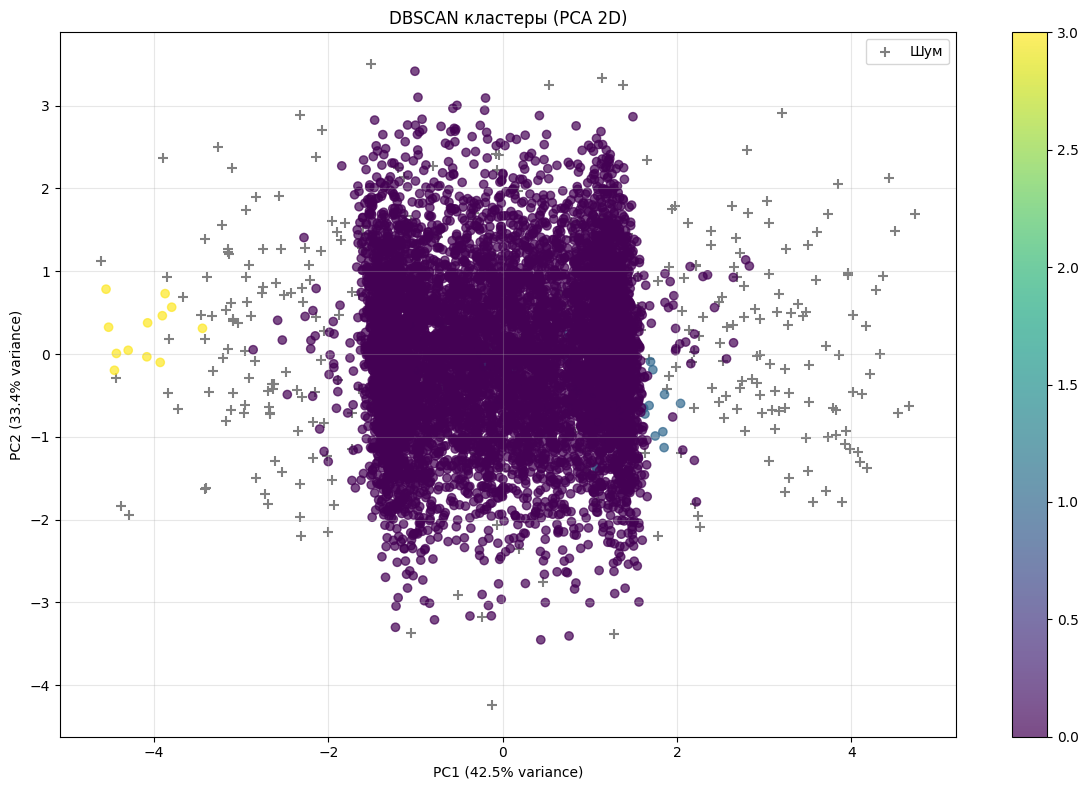

In [27]:
km = KMeans(n_clusters=2, n_init=10, random_state=42)
db = DBSCAN(eps=0.7, min_samples=12)


km.fit(X)
db.fit(X)

fig_km, ax_km = plot_pca_clusters(km, X) 
fig_km.savefig("./artifacts/figures/KMeans_2ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

fig_db, ax_db = plot_pca_clusters(db, X)
fig_db.savefig("./artifacts/figures/DBSCAN_2ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

Выводы в результате эксперемента:

- **Лучший метод**: `KMeans (n_clusters=2)`
- **Метрики**: Silhouette=**0.307**, DB=1.323, CH=3573
- **Комментарий**: Однородная структура данных с множеством неплотных вкраплений по краям, которые `DBSCAN` определяет как отдельные кластеры (Silhouette max 0.35). `KMeans` даёт чёткие 2 кластера с приемлемой компактностью, а `DBSCAN` определяет кластеры хаотично.

      P.S.Данный датасет в целом разделяется не очень.

In [28]:
best_configs["ds2"] = {
    "model": "KMeans",
    "params":{
        "n_clusters": 2,
        "n_init": 10,
        "random_state": 42
    }
}
save_cluster_labels(km, df_2, X, "./artifacts/labels/labels_hw07_ds2.csv")

In [29]:
X = get_features(df_3, "x1", "f_noise")

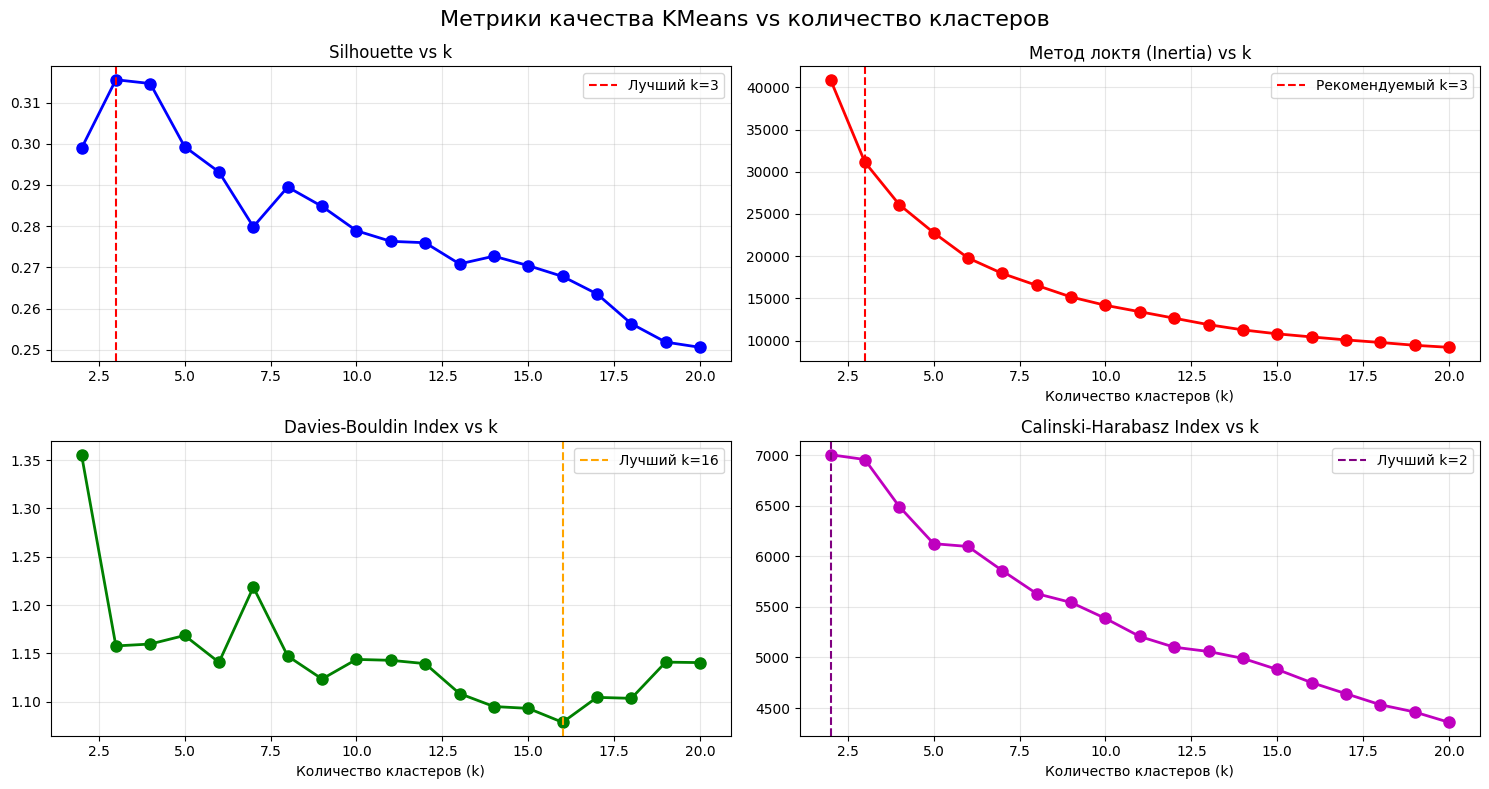

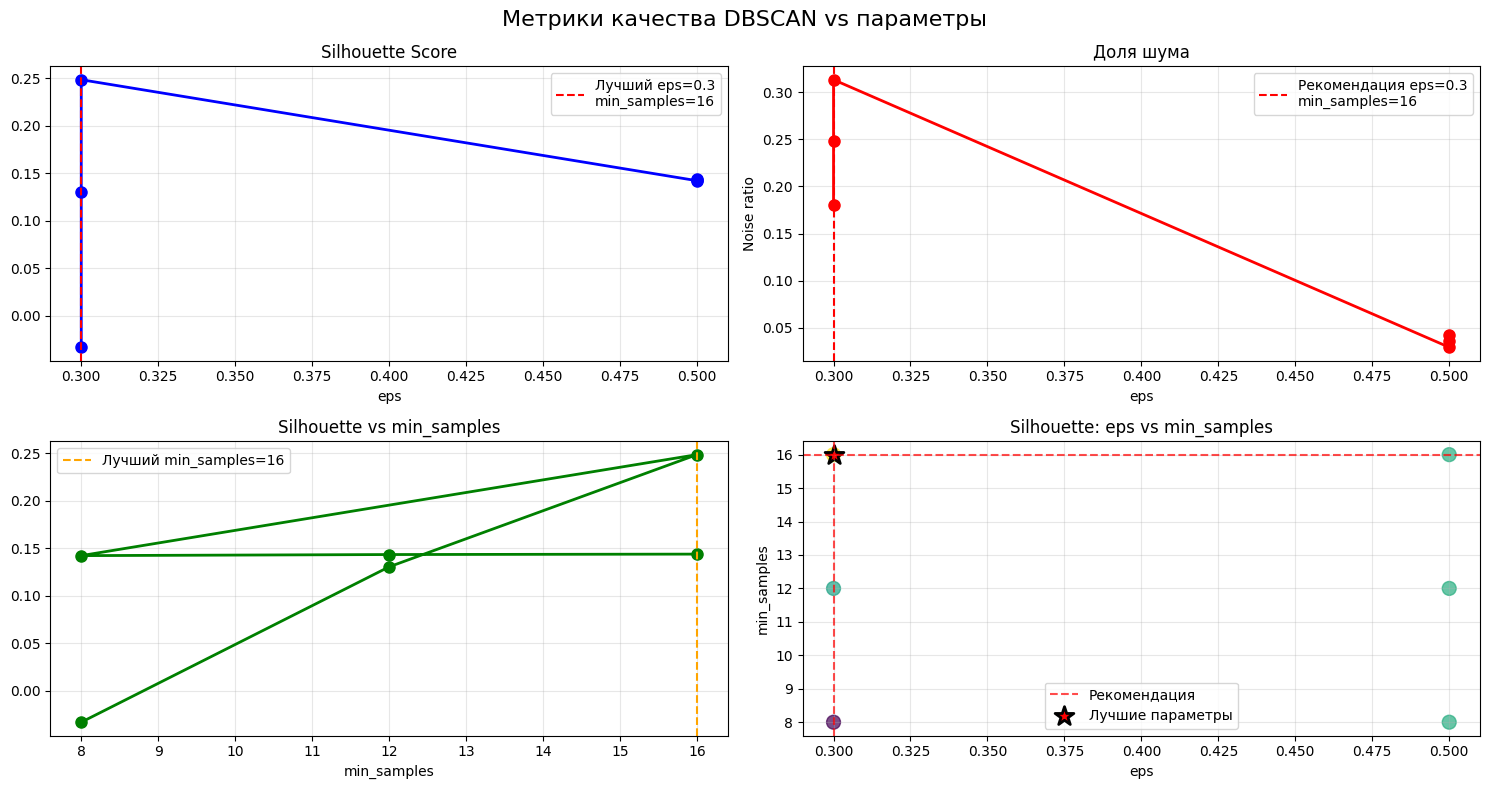

In [30]:
km_valid_res, db_valid_res = draw_validation(
    X, 
    "./artifacts/figures/KMeans_3ds_metrics.png", 
    "./artifacts/figures/DBSCAN_3ds_metrics.png"
)

metrics_summary["ds3"] = {
    "KMeans": km_valid_res,
    "DBSCAN": db_valid_res
}

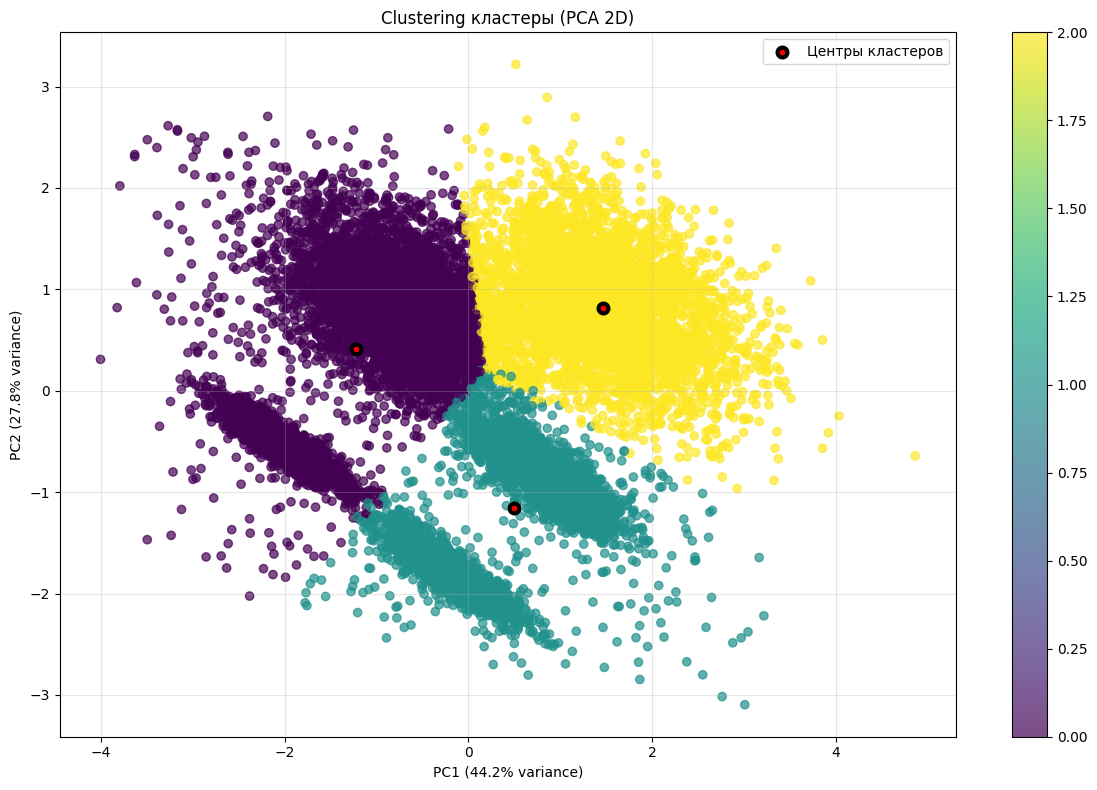

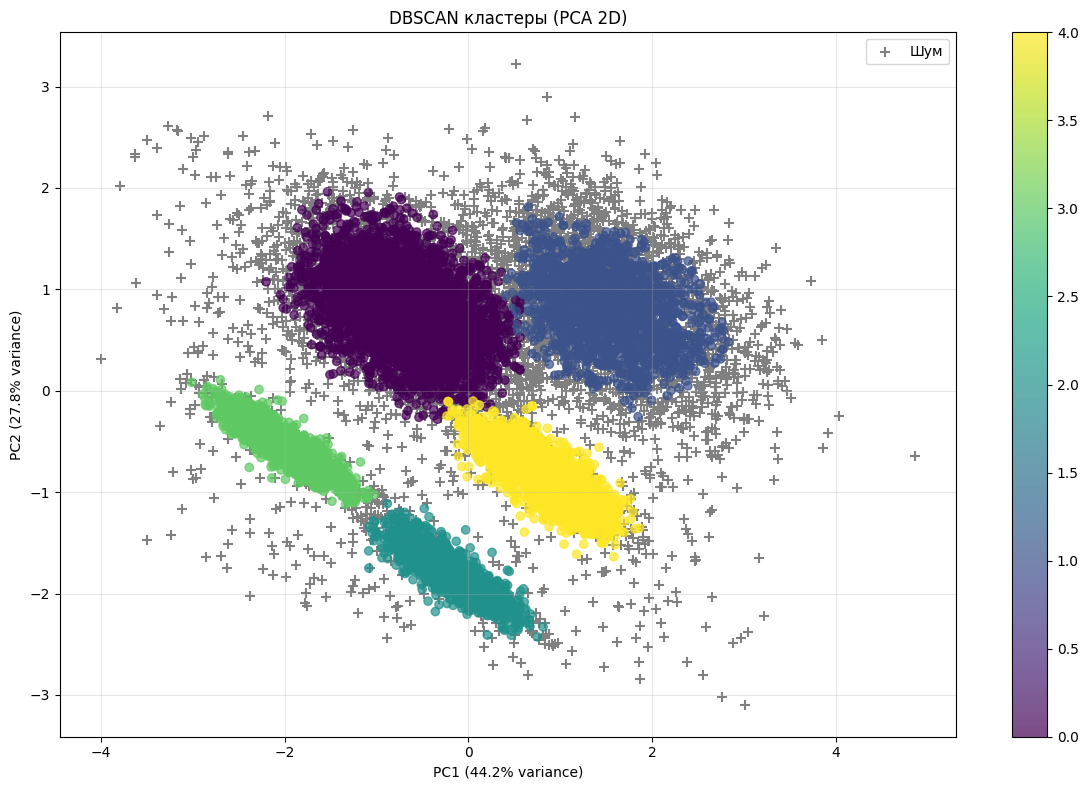

In [31]:
km = KMeans(n_clusters=3, n_init=10, random_state=42)
db = DBSCAN(eps=0.32, min_samples=16) #визуально + 0.02 даёт вероятно лучший результат, где нету мелких кластеров и они слиты в один большой


km.fit(X)
db.fit(X)

fig_km, ax_km = plot_pca_clusters(km, X) 
fig_km.savefig("./artifacts/figures/KMeans_3ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

fig_db, ax_db = plot_pca_clusters(db, X)
fig_db.savefig("./artifacts/figures/DBSCAN_3ds_res.png", dpi=300, bbox_inches='tight')
plt.show()

Выводы в результате эксперемента:
- **Лучший метод**: `DBSCAN (eps=0.32, min_samples=16)`
- **Метрики**: Silhouette=**0.248**, DB=1.165, CH=2909
- **Доля шума**: **31.3%**
- **Почему**: Применение `DBSCAN` даёт отчётливые кластеры на PCA (`KMeans` делит визуально заметно хуже) и нормальные показатели метрик.

In [32]:
best_configs["ds3"] = {
    "model": "DBSCAN",
    "params":{
        "eps": 0.32,
        "min_samples": 16
    }
}

save_cluster_labels(db, df_3, X, "./artifacts/labels/labels_hw07_ds3.csv")


with (
    open("./artifacts/metrics_summary.json", "w", encoding="utf-8") as ms,
    open("./artifacts/best_configs.json", "w", encoding="utf-8") as bg
):
    json.dump(metrics_summary, ms, indent=2, ensure_ascii=False)
    json.dump(best_configs, bg, indent=2, ensure_ascii=False)


В качестве устойчивости проверим `KMeans` на втором датасете при помощи `ARI` и моей собственной метрики - `inertia_ratio`. Суть `inertia_ratio` в том, что она измеряет, насколько сильно разбиение на кластеры уменьшает "разброс" данных по сравнению с ситуацией, когда кластера вообще нет.

In [34]:

X = get_features(df_2, "x1", "z_noise")

seeds = [123, 345, 567, 879, 234, 456, 768, 890]
labels_list = []

for seed in seeds:
    model = KMeans(n_clusters=2, random_state=seed, n_init=10)
    labels = model.fit_predict(X)
    labels_list.append(labels)

ari_scores = []

for i in range(len(seeds)):
    for j in range(i+1, len(seeds)):
        ari = adjusted_rand_score(labels_list[i], labels_list[j])
        ari_scores.append(ari)

print(f"ARI между разными запусками: {np.mean(ari_scores):.3f} ± {np.std(ari_scores):.3f}")
print(f"ARI по парам: {ari_scores}")
print(30 * "===")

######## Собственная метрика
base_model = KMeans(n_clusters=1, random_state=42, n_init=10)
base_model.fit(X)
base_inertia = base_model.inertia_

opt_model = labels_list[0]  
opt_inertia = KMeans(n_clusters=2, random_state=seeds[0], n_init=10)
opt_inertia.fit(X)
opt_inertia = opt_inertia.inertia_

inertia_ratio = opt_inertia / base_inertia

print(f"Inertia Ratio (K=2 vs K=1): {inertia_ratio:.3f}")
print(f"{100*(1-inertia_ratio):.1f}% вариации объяснено кластерами")

ARI между разными запусками: 0.998 ± 0.001
ARI по парам: [0.9965026252845299, 0.9965026252845299, 0.9975012501250932, 0.9980007500692895, 0.9985003750281704, 0.9975012501263087, 0.9994999999933609, 1.0, 0.9990001250037445, 0.9975012501271363, 0.9970018751987747, 0.998000750070929, 0.9960035003870104, 0.9990001250037445, 0.9975012501271363, 0.9970018751987747, 0.998000750070929, 0.9960035003870104, 0.9985003750293966, 0.9980007500700027, 0.9990001250042078, 0.9970018751964865, 0.9994999999941705, 0.9994999999943978, 0.9975012501252655, 0.9990001250042078, 0.9980007500684769, 0.997001875197965]
Inertia Ratio (K=2 vs K=1): 0.691
30.9% вариации объяснено кластерами


Результаты эксперимента показывают, что кластеризация является устойчивой к выбору начальной инициализации центров.

- Среднее значение ARI между разными запусками составляет 0.998 ± 0.001,
что указывает на почти полное совпадение разметок кластеров при различных random_state.

- Значения ARI по всем парам запусков находятся в диапазоне ≈ 0.996 – 1.000,
что свидетельствует об отсутствии конкурирующих локальных минимумов.

Дополнительно, анализ инерции показал, что при разбиении на два кластера:

- внутрикластерная дисперсия уменьшается на 30.9% по сравнению с моделью без кластеризации (K=1),

- значение метрики стабильно при различных инициализациях, что подтверждает устойчивость качества разбиения.